In [2]:
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
import eleanor
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord

plt.rcParams['font.size'] = 16

star = eleanor.Source(tic=38846515, sector='recent')

print(star.tic, star.coords, star.gaia)
print('Found TIC {0} (Gaia {1}), with TESS magnitude {2}, RA {3}, and Dec {4}'
     .format(star.tic, star.gaia, star.tess_mag, star.coords[0], star.coords[1]))

No eleanor postcard has been made for your target (yet). Using TessCut instead.
38846515 [68.9597092399964, -64.0270368810381] 4675352109659600000
Found TIC 38846515 (Gaia 4675352109659600000), with TESS magnitude 10.3157, RA 68.9597092399964, and Dec -64.0270368810381


Text(0.5, 1.0, 'WASP-100')

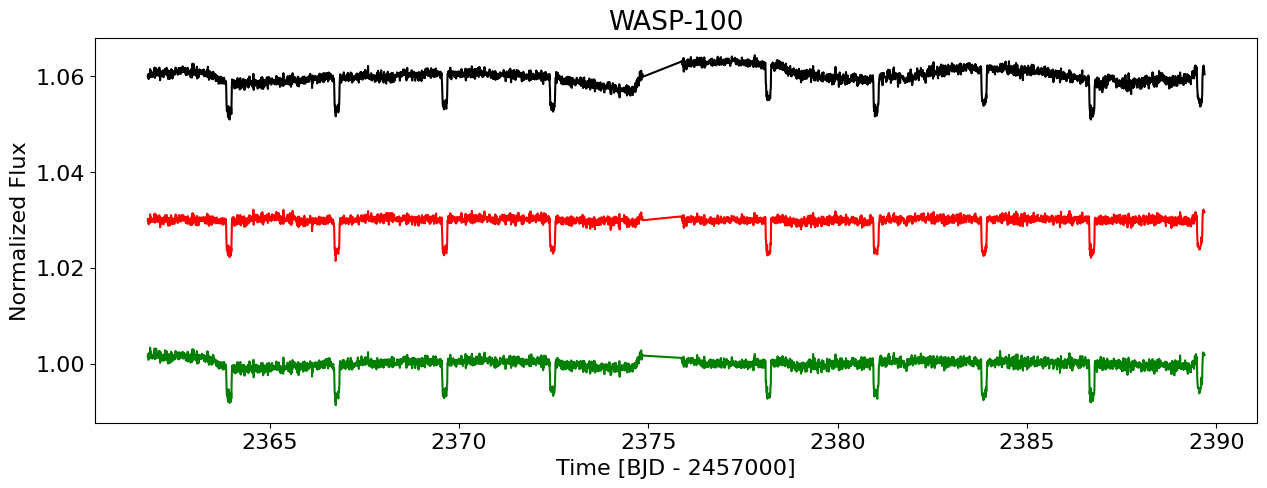

In [3]:
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=False, do_pca=True, regressors='corner')
plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]) + 0.06, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'r')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), 'g')
# plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, 'b')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('WASP-100')


PC_LEVEL


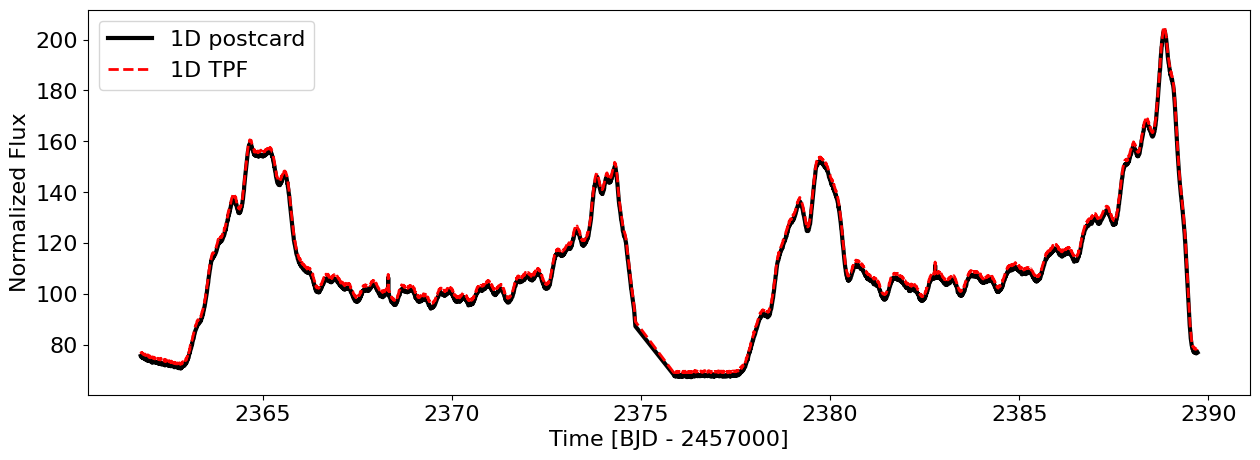

In [4]:
print(data.bkg_type)
plt.figure(figsize=(15,5))

plt.plot(data.time, data.flux_bkg, 'k', label='1D postcard', linewidth=3)
plt.plot(data.time, data.tpf_flux_bkg, 'r--', label='1D TPF', linewidth=2)
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.legend()

Text(0.5, 1.0, 'Aperture')

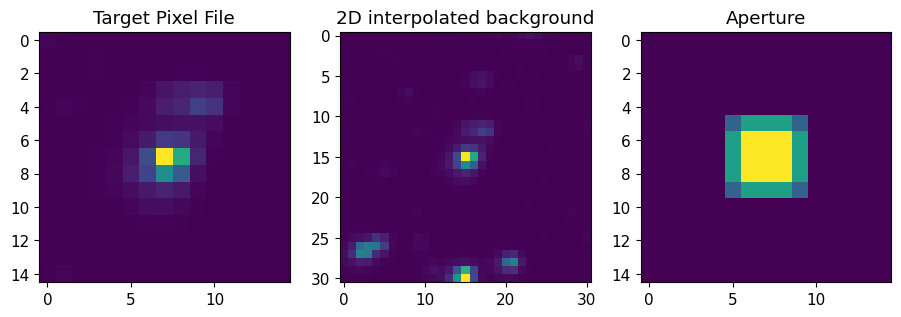

In [5]:
plt.rcParams['font.size'] = 11
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(11,4))
ax1.imshow(data.tpf[0])
ax1.set_title('Target Pixel File')
ax2.imshow(data.bkg_tpf[0])
ax2.set_title('2D interpolated background')
ax3.imshow(data.aperture)
ax3.set_title('Aperture')

No eleanor postcard has been made for your target (yet). Using TessCut instead.


Text(0.5, 1.0, 'TOI-674')

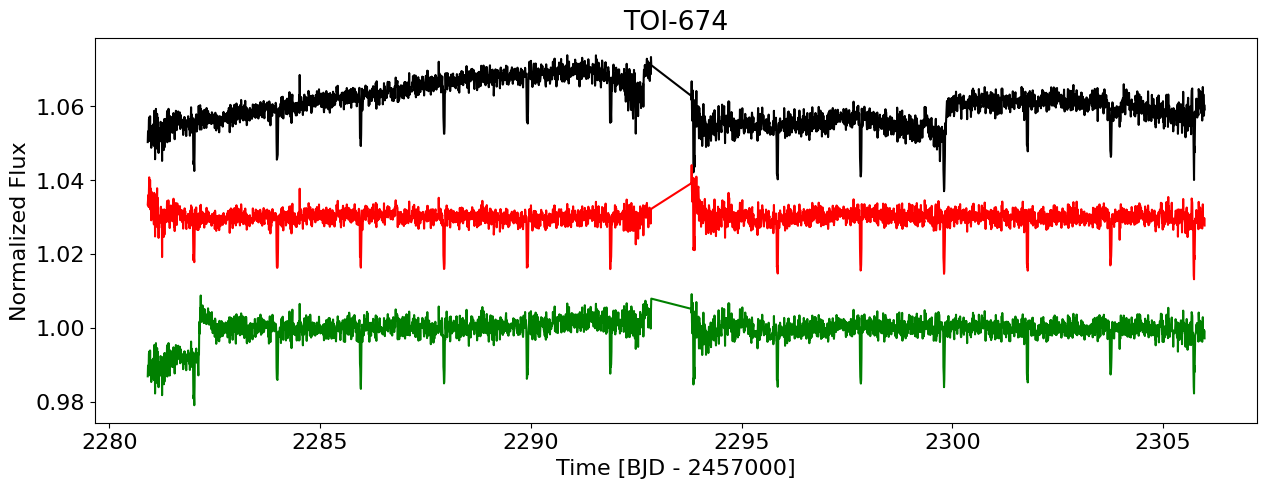

In [6]:
star2 = eleanor.Source(name='TOI-674', sector='recent')
data2 = eleanor.TargetData(star2, height=15, width=15, bkg_size=31, do_psf=False, do_pca=True, regressors='corner')
plt.figure(figsize=(15,5))

q2 = data2.quality == 0

plt.rcParams['font.size'] = 16

plt.plot(data2.time[q2], data2.raw_flux[q2]/np.nanmedian(data2.raw_flux[q2]) + 0.06, 'k')
plt.plot(data2.time[q2], data2.corr_flux[q2]/np.nanmedian(data2.corr_flux[q2]) + 0.03, 'r')
plt.plot(data2.time[q2], data2.pca_flux[q2]/np.nanmedian(data2.pca_flux[q2]), 'g')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('TOI-674')

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

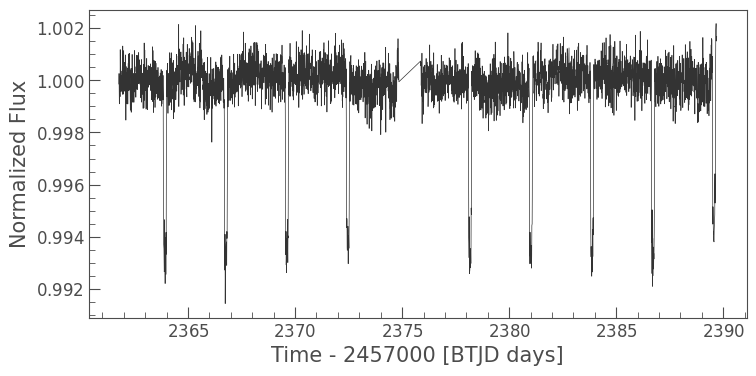

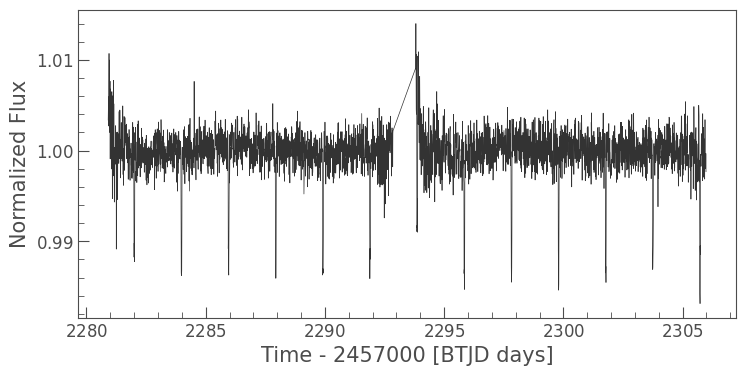

In [7]:
import lightkurve as lk

lk1 = data.to_lightkurve()
lk1 = lk1.normalize()
lk1.plot()

lk2 = data2.to_lightkurve()
lk2 = lk2.normalize()
lk2.plot()

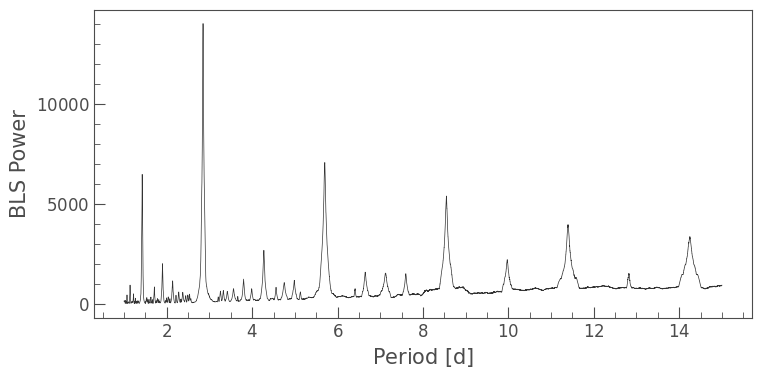

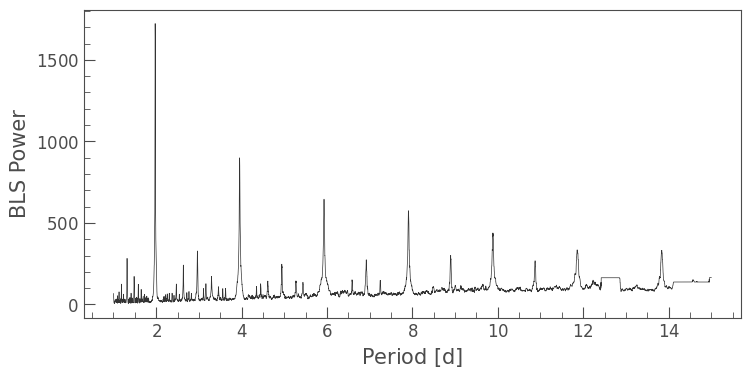

In [8]:
period = np.linspace(1, 15, 10000)
# Create a BLSPeriodogram
bls1 = lk1.to_periodogram(method='bls', period=period, frequency_factor=500);
bls1.plot();

bls2 = lk2.to_periodogram(method='bls', period=period, frequency_factor=500);
bls2.plot();

In [16]:
planet_1_period = bls1.period_at_max_power
planet_2_period = bls2.period_at_max_power

planet_1_t0 = bls1.transit_time_at_max_power
planet_2_t0 = bls2.transit_time_at_max_power

planet_1_dur = bls1.duration_at_max_power
planet_2_dur = bls2.duration_at_max_power

print(planet_1_period)
print(planet_2_period)

2.8495849584958495 d
1.9758975897589757 d


(-1.0, 1.0)

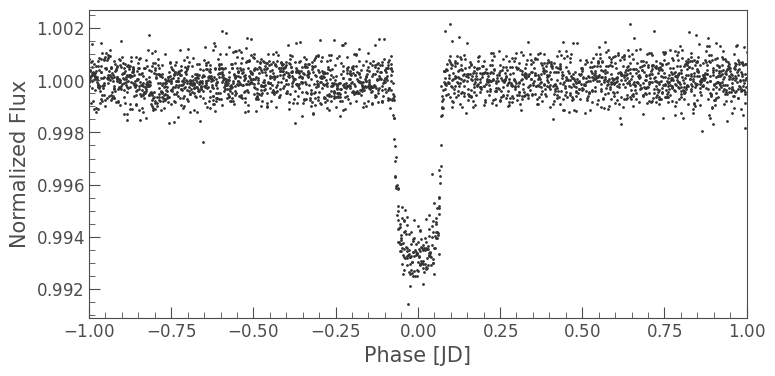

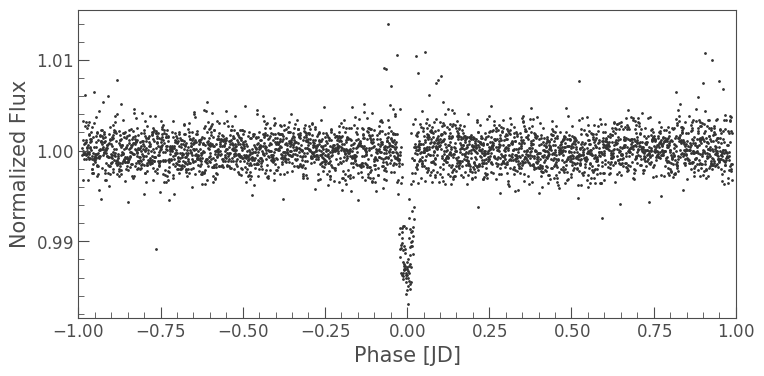

In [10]:
ax1 = lk1.fold(period=planet_1_period, epoch_time=planet_1_t0).scatter()
ax1.set_xlim(-1, 1);

ax2 = lk2.fold(period=planet_2_period, epoch_time=planet_2_t0).scatter()
ax2.set_xlim(-1, 1)

(2285.0, 2292.0)

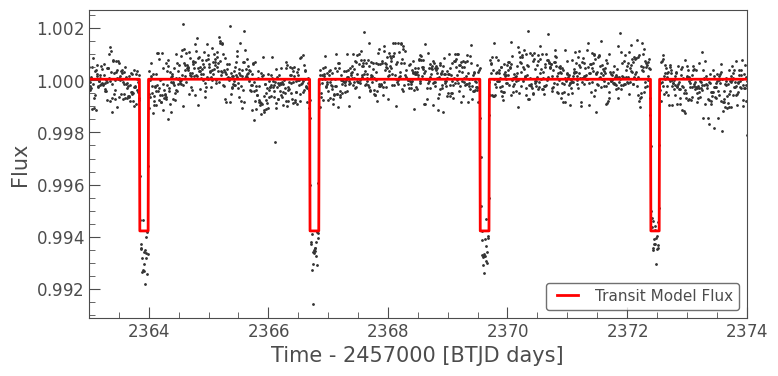

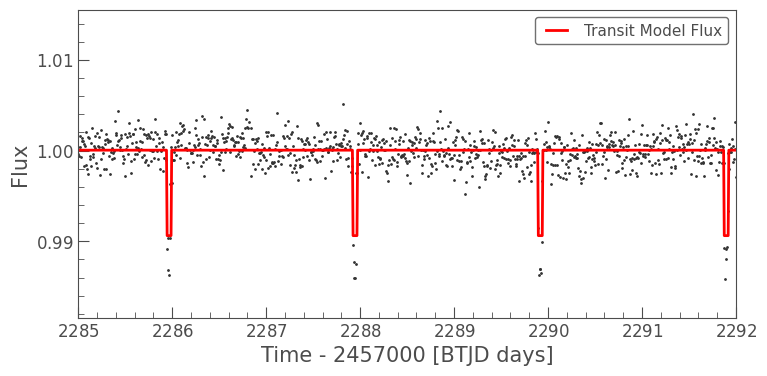

In [23]:
planet_1_model = bls1.get_transit_model(period=planet_1_period, transit_time=planet_1_t0, duration=planet_1_dur)
ax1 = lk1.scatter()
planet_1_model.plot(ax=ax1, c='r', lw=2)
ax1.set_xlim(2363, 2374)

planet_2_model = bls2.get_transit_model(period=planet_2_period, transit_time=planet_2_t0, duration=planet_2_dur)
ax2 = lk2.scatter()
planet_2_model.plot(ax=ax2, c='r', lw=2)
ax2.set_xlim(2285, 2292)